## PART I:
EDA & Data Preprocessing on Google App Store Rating Dataset.

### 1. Import required libraries and read the dataset.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv("Appdata.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.



In [24]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [26]:
data.shape

(10841, 13)

In [27]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## EDA and Preprocessing

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [28]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [29]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.select_dtypes(include="object").describe()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### 4. Check if there are any duplicate records in the dataset? if any drop them.

#### for counting the values in given data:

In [31]:
data.App.value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [32]:
data.duplicated().sum()

483

In [33]:
data.drop_duplicates(inplace=True)
data.shape

(10358, 13)

In [34]:
data.duplicated().sum()

0

In [35]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [36]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [37]:
np.where(data['Category']=='1.9')

(array([9990]),)

In [38]:
data=data[data['Category']!='1.9']

In [39]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [40]:
data['Rating'].isnull().sum()

1465

In [41]:
data.dropna(subset=['Rating'],inplace=True)


In [42]:
data['Rating'].isnull().sum()

0

In [43]:
data['Rating_category']=data['Rating'].apply(lambda x: "high" if x>3.5 else "low")

In [44]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
9812,YEBIS OpenGL ES 3.0 Tech Demo,FAMILY,4.6,380,6.7M,"10,000+",Free,0,Everyone,Entertainment,"March 11, 2014",1.0,4.3 and up,high
6009,"Izneo, Read Manga, Comics & BD",COMICS,3.3,1476,18M,"500,000+",Free,0,Teen,Comics,"June 11, 2018",7.3,4.0 and up,low
2843,Snap Cat Face Camera,PHOTOGRAPHY,4.0,5855,4.9M,"1,000,000+",Free,0,Everyone,Photography,"July 12, 2018",1.6,2.3 and up,high
2571,Amino: Communities and Chats,SOCIAL,4.8,1259075,62M,"10,000,000+",Free,0,Teen,Social,"July 20, 2018",1.8.19179,4.0.3 and up,high
4000,"C Launcher: Themes, Wallpapers, DIY, Smart, Clean",PERSONALIZATION,4.5,901110,Varies with device,"10,000,000+",Free,0,Everyone 10+,Personalization,"July 10, 2018",Varies with device,Varies with device,high


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [45]:
data['Rating_category'].value_counts()

Rating_category
high    8012
low      880
Name: count, dtype: int64

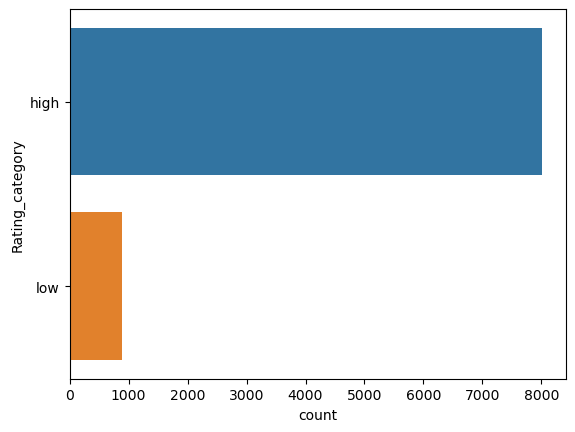

In [46]:
sns.countplot(data=data,y="Rating_category")
plt.show()

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [47]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


<Axes: >

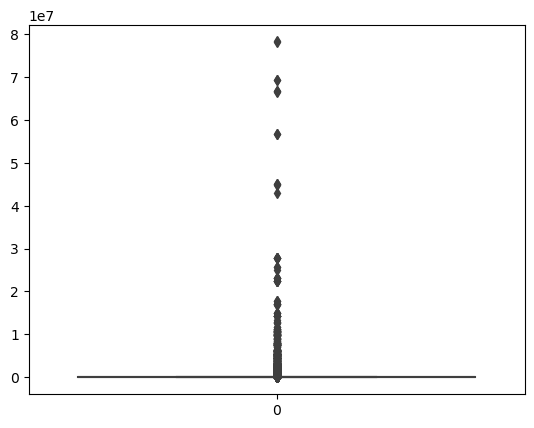

In [49]:
sns.boxplot(data=data['Reviews'])

In [50]:
Q1 = data['Reviews'].quantile(0.25)
Q3 = data['Reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Reviews'] < lower_bound) | (data['Reviews'] > upper_bound)]

data['Reviews'] = np.log(data['Reviews'])

<Axes: >

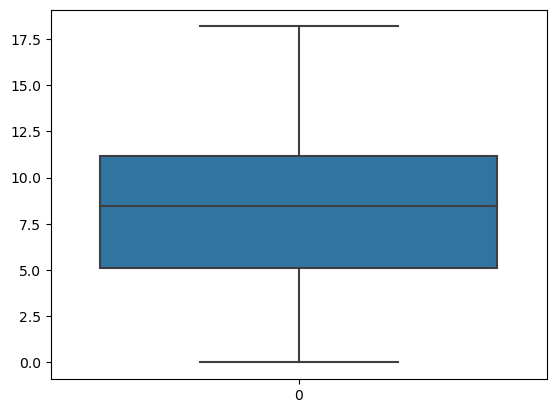

In [51]:
sns.boxplot(data=data["Reviews"])

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [52]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [53]:
data=data[data['Size']!='Varies with device']

In [54]:
def convert_num(values):
    return values.replace({'M': 'e6', 'k': 'e3'}, regex=True).map(pd.eval).astype(float)
convert_num(data['Size'])


0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

In [55]:
data['Size']=convert_num(data['Size'])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   object 
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), object(11)
memory usage: 870.0+ KB


### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [57]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [58]:
data['Installs']=data['Installs'].str.replace(",","")
data['Installs']=data['Installs'].str.replace("+","")
data['Installs']=data['Installs'].astype(int)

In [59]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int64  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 870.0+ KB


In [61]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high


### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [62]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [63]:
data["Price"]=data["Price"].str.replace("$","")
data["Price"]=data["Price"].str.replace(".","")
data["Price"]=data["Price"].astype(int)

In [64]:
data['Price'].unique()

array([    0,   499,   699,   799,   399,   599,   299,   199,   999,
          99,   900,   549,  1000,  2499,  1199,  7999,  1699,  1499,
        2999,  1299,   349,  1099,   749,   150,  1999,  1599,  3399,
        3999,   249,   449,   170,   149,   388, 39999,  1799, 40000,
         302,   176,   484,   477,   161,   159,   649,   129, 29999,
       37999,  3799,  1899, 38999,   849,   175,  1400,   200,   308,
         259,  1940,  1546,   899,   304,  1399,   429,   328,   460,
         100,   290,   197,   256,   120])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   int64  
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   int64  
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 870.0+ KB


### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)



In [66]:
data=data.drop(columns=['Rating','App','Genres','Last Updated','Current Ver','Android Ver'])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int64  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   int64  
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 522.0+ KB


### 13. Encode the categorical columns.

In [68]:
data1=data.copy()

In [69]:
data1=pd.get_dummies(data=data1,prefix='Category',drop_first=True,columns=['Category'])

In [70]:
data1=pd.get_dummies(data=data1,prefix="Type",drop_first=True,columns=['Type'])

In [71]:
data1=pd.get_dummies(data=data1,prefix="content",drop_first=True,columns=['Content Rating'])

In [72]:
data1.sample(5)

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,content_Everyone,content_Everyone 10+,content_Mature 17+,content_Teen,content_Unrated
5671,4.060443,15000000.0,10000,0,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1970,16.468865,52000000.0,100000000,0,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
74,8.856661,17000000.0,500000,0,high,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1250,12.716522,34000000.0,10000000,0,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9596,7.986505,28000000.0,100000,0,high,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [73]:
dependent=data1['Rating_category']
independent=data1.drop(columns=['Rating_category'],axis=1)

In [74]:
dependent.head()

0    high
1    high
2    high
3    high
4    high
Name: Rating_category, dtype: object

In [75]:
independent.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,content_Everyone,content_Everyone 10+,content_Mature 17+,content_Teen,content_Unrated
0,5.068904,19000000.0,10000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6.874198,14000000.0,500000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,11.379508,8700000.0,5000000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,12.281384,25000000.0,50000000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6.874198,2800000.0,100000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### 15. Split the dataset into train and test.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.3)

### 16. Standardize the data, so that the values are within a particular range.

In [78]:
from sklearn.preprocessing import StandardScaler
numerical_columns=['Reviews','Size','Installs','Price']
std_scaler=StandardScaler()
data1[numerical_columns]=std_scaler.fit_transform(data1[numerical_columns])

In [79]:
data1.head(5)

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,content_Everyone,content_Everyone 10+,content_Mature 17+,content_Teen,content_Unrated
0,-0.679953,-0.159928,-0.168764,-0.063058,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-0.196531,-0.373300,-0.158181,-0.063058,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.009900,-0.599475,-0.060990,-0.063058,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1.251404,0.096119,0.910911,-0.063058,high,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.196531,-0.851254,-0.166820,-0.063058,high,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
